Week 1: Data visualization

In [ ]:
import numpy as np
import pandas as pd

Initial and create copy of data 

In [210]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/home/antonios/Desktop/Practica_de_vara/data-science-internship2/data/raw/FIFA_players_21.csv")
fifa = data.copy()
fifa.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


Checking for the missing columns (35% plus)

In [211]:
missing_pct = (fifa.isnull().sum() / len(fifa) * 100).round(2)

empty_columns = missing_pct[missing_pct > 25].sort_values(ascending=False)

print("\nColumns with >25% missing values:")
print(empty_columns)


fifa = fifa.drop(columns=empty_columns.index, errors="ignore")



Columns with >25% missing values:
defending_marking       100.00
loaned_from              96.00
nation_jersey_number     94.05
nation_position          94.05
player_tags              92.57
gk_diving                89.00
gk_kicking               89.00
gk_handling              89.00
gk_reflexes              89.00
gk_speed                 89.00
gk_positioning           89.00
player_traits            56.11
dtype: float64


CHECK FOR DUPLICATES

In [212]:
def find_duplicate_columns(df):
    duplicate_columns = []
    columns = df.columns
    
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            if df[col1].equals(df[col2]):
                duplicate_columns.append((col1, col2))
    
    return duplicate_columns

# Find all duplicate column pairs
duplicate_cols = find_duplicate_columns(fifa)

if duplicate_cols:
    print(f"Found {len(duplicate_cols)} duplicate column pairs:")
    for col1, col2 in duplicate_cols:
        print(f"  {col1} = {col2}")
else:
    print("No duplicate columns found")




Found 22 duplicate column pairs:
  ls = st
  ls = rs
  st = rs
  lw = rw
  lf = cf
  lf = rf
  cf = rf
  lam = cam
  lam = ram
  cam = ram
  lm = rm
  lcm = cm
  lcm = rcm
  cm = rcm
  lwb = rwb
  ldm = cdm
  ldm = rdm
  cdm = rdm
  lb = rb
  lcb = cb
  lcb = rcb
  cb = rcb


REMOVE DUPLICATES

In [213]:
def remove_duplicate_columns(data):
    # Get transpose to use drop_duplicates on columns
    df_t = data.T
    df_t_unique = df_t.drop_duplicates()
    
    # Get back to original orientation
    df_unique = df_t_unique.T
    
    removed_cols = set(data.columns) - set(df_unique.columns)
    
    if removed_cols:
        print(f"Removed duplicate columns: {list(removed_cols)}")
    else:
        print("No duplicate columns to remove")
    
    return df_unique


original_columns = fifa.shape[1]
fifa = remove_duplicate_columns(fifa)
removed_duplicate_cols = original_columns - fifa.shape[1]

print(f"Original columns: {original_columns}")
print(f"Final columns: {fifa.shape[1]}")
print(f"Removed {removed_duplicate_cols} duplicate columns")


for i in fifa.columns:
    print(i)

Removed duplicate columns: ['rcb', 'st', 'cb', 'rf', 'rwb', 'rs', 'cf', 'rb', 'cm', 'cdm', 'rm', 'rcm', 'rw', 'ram', 'cam', 'rdm']
Original columns: 94
Final columns: 78
Removed 16 duplicate columns
sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
team_position
team_jersey_number
joined
contract_valid_until
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions

CHECK DTYPES

In [214]:
expected_dtypes = {
    # Basic Info
    'sofifa_id': 'int64',
    'player_url': 'object',
    'short_name': 'object', 
    'long_name': 'object',
    'age': 'int64',
    'dob': 'object',
    'height_cm': 'int64',
    'weight_kg': 'int64',
    'nationality': 'object',
    
    # Club & League
    'club_name': 'object',
    'league_name': 'object', 
    'league_rank': 'int64',
    
    # Ratings & Market Value
    'overall': 'int64',
    'potential': 'int64',
    'value_eur': 'int64',
    'wage_eur': 'int64',
    
    # Position & Physical
    'player_positions': 'object',
    'preferred_foot': 'object',
    'international_reputation': 'int64',
    'weak_foot': 'int64',
    'skill_moves': 'int64',
    'work_rate': 'object',
    'body_type': 'object',
    'real_face': 'object',
    
    # Contract & Transfer
    'release_clause_eur': 'int64',
    'team_position': 'object',
    'team_jersey_number': 'int64',
    'joined': 'object',
    'contract_valid_until': 'int64',
    
    # Base Attributes
    'pace': 'int64',
    'shooting': 'int64', 
    'passing': 'int64',
    'dribbling': 'int64',
    'defending': 'int64',
    'physic': 'int64',
    
    # Attacking Stats
    'attacking_crossing': 'int64',
    'attacking_finishing': 'int64',
    'attacking_heading_accuracy': 'int64',
    'attacking_short_passing': 'int64',
    'attacking_volleys': 'int64',
    
    # Skill Attributes
    'skill_dribbling': 'int64',
    'skill_curve': 'int64',
    'skill_fk_accuracy': 'int64',
    'skill_long_passing': 'int64',
    'skill_ball_control': 'int64',
    
    # Movement Stats
    'movement_acceleration': 'int64',
    'movement_sprint_speed': 'int64',
    'movement_agility': 'int64',
    'movement_reactions': 'int64',
    'movement_balance': 'int64',
    
    # Power Stats
    'power_shot_power': 'int64',
    'power_jumping': 'int64',
    'power_stamina': 'int64',
    'power_strength': 'int64',
    'power_long_shots': 'int64',
    
    # Mentality Stats
    'mentality_aggression': 'int64',
    'mentality_interceptions': 'int64',
    'mentality_positioning': 'int64',
    'mentality_vision': 'int64',
    'mentality_penalties': 'int64',
    'mentality_composure': 'int64',
    
    # Defending Stats
    'defending_standing_tackle': 'int64',
    'defending_sliding_tackle': 'int64',
    
    # Goalkeeping
    'goalkeeping_diving': 'int64',
    'goalkeeping_handling': 'int64', 
    'goalkeeping_kicking': 'int64',
    'goalkeeping_positioning': 'int64',
    'goalkeeping_reflexes': 'int64',
    
    # Position columns
    'ls': 'int64', 
    'lw': 'int64', 
    'lf': 'int64', 
    'lam': 'int64', 
    'lm': 'int64', 
    'lcm': 'int64', 
    'lwb': 'int64', 
    'ldm': 'int64', 
    'lb': 'int64', 
    'lcb': 'int64', 
}

current_dtypes = fifa.dtypes

correct_dtypes = []
incorrect_dtypes = []
missing_columns = []
extra_columns = []

for col, expected_type in expected_dtypes.items():
    if col in current_dtypes:
        current_type = str(current_dtypes[col])
        if current_type == expected_type:
            correct_dtypes.append((col,current_type))
        else:
            incorrect_dtypes.append((col, current_type, expected_type))
    else:
        missing_columns.append((col,expected_type))


for col in current_dtypes.index:
    if col not in expected_dtypes:
        extra_columns.append((col, str(current_dtypes[col])) )

current_dtypes
correct_dtypes
missing_columns # none
extra_columns # none
incorrect_dtypes
data["goalkeeping_diving"].unique()[:5]


array([ 6,  7, 87, 15,  9])

MODIFY THE INCORRECT COLUMNS TO HAVE THE GOOD DTYPE

In [215]:
def clean_fifa_dtypes(data):
    """Clean FIFA data types based on expected categories"""
    print(f"Before dtypes: {data.shape}")
    print("Cleaning FIFA data types...")
    
    # All numeric columns that should be Int64 (nullable integer)
    # Based on your column list - all these should be converted to int64
    numeric_columns = [
        'sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 
        'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 
        'skill_moves', 'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
        'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
        'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
        'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
        'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
        'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
        'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
        'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
        'mentality_penalties', 'mentality_composure', 'defending_standing_tackle',
        'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
        'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
        'ls', 'lw', 'lf', 'lam', 'lm', 'lcm', 'lwb', 'ldm', 'lb', 'lcb'
    ]
    
    # Position columns that may have '+' format (like '89+3')
    position_columns = ['ls', 'lw', 'lf', 'lam', 'lm', 'lcm', 'lwb', 'ldm', 'lb', 'lcb']
    
    # Other numeric columns (without '+' format)
    other_numeric = [col for col in numeric_columns if col not in position_columns]
    
    # Handle position columns with '+' format
    for col in position_columns:
        if col in data.columns:
            try:
                # Extract the number before '+' if it exists, otherwise use the whole string
                data[col] = data[col].astype(str).str.split('+').str[0]
                data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
                #print(f" Converted {col} to Int64 (handled '+' format)")
            except Exception as e:
                print(f" Failed to convert {col}: {e}")
    
    # Handle other numeric columns normally
    for col in other_numeric:
        if col in data.columns:
            try:
                data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
                #print(f" Converted {col} to Int64")
            except Exception as e:
                print(f" Failed to convert {col}: {e}")
    
    # Handle categorical columns only if they exist in the data
    potential_categorical_columns = ['nationality', 'club_name', 'league_name', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'team_position', 'short_name']
    
    for col in potential_categorical_columns:
        if col in data.columns:
            data[col] = data[col].astype('category')
            #print(f" Converted {col} to category with {data[col].nunique()} unique values")
    
    datetime_cols = ['dob', 'joined']
    for col in datetime_cols:
        if col in data.columns:
            try:
                data[col] = pd.to_datetime(data[col], errors='coerce')
            except Exception as e:
                print(f" Failed to convert {col} to datetime: {e}")

    string_columns = ['player_url', 'long_name']
    for col in string_columns:
        if col in data.columns:
            try:
                data[col] = data[col].astype('string')
            except Exception as e:
                print(f" Failed to convert {col} to string: {e}")

    
    # Handle boolean columns if they exist
    if 'real_face' in data.columns:
        data['real_face'] = data['real_face'].map({'Yes': True, 'No': False, True: True, False: False})
        #print("Converted real_face to boolean")
    
    #print(f"After dtypes: {data.shape}")
    print("\nFinal data types summary:")
    print(data.dtypes.value_counts())
    
    # Show which columns still have object dtype (these might need attention)
    object_cols = data.select_dtypes(include=['object']).columns.tolist()
    if object_cols:
        print(f"\n Columns still as 'object' dtype: {object_cols}")
    
    return data


fifa = clean_fifa_dtypes(fifa)

Before dtypes: (18944, 78)
Cleaning FIFA data types...

Final data types summary:
Int64             64
string             2
datetime64[ns]     2
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
bool               1
category           1
Name: count, dtype: int64


DTYPES SHOWING

Data Type Summary:
------------------------------
Int64          : 64 columns
string         :  2 columns
datetime64[ns] :  2 columns
category       :  1 columns
category       :  1 columns
category       :  1 columns
category       :  1 columns
category       :  1 columns
category       :  1 columns
category       :  1 columns
category       :  1 columns
bool           :  1 columns
category       :  1 columns
------------------------------
Total          : 78 columns


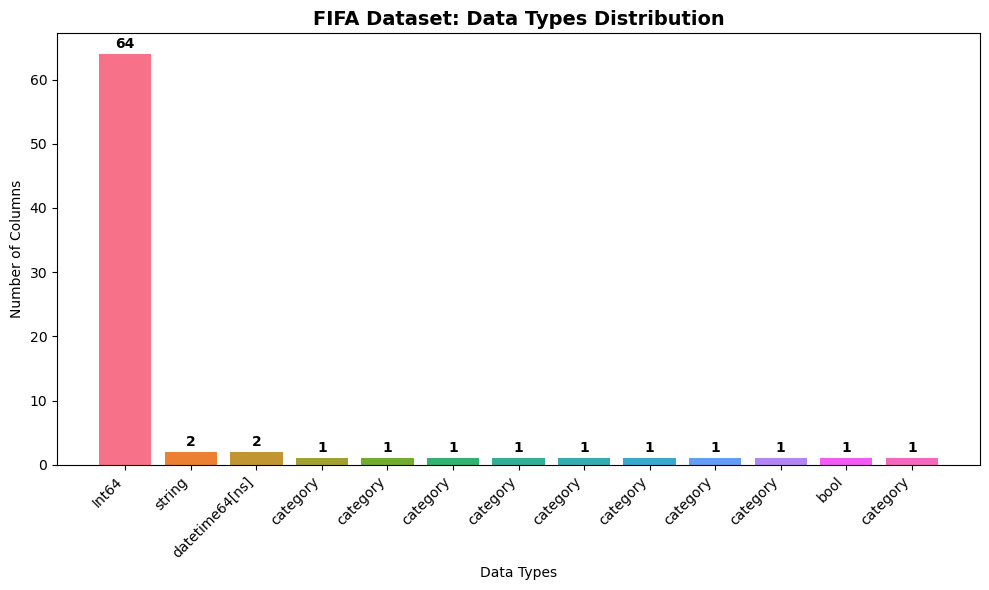

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple version - just dtype counts
plt.figure(figsize=(10, 6))
dtype_counts = fifa.dtypes.value_counts()

# Use numeric positions for x-axis, then set custom labels
x_positions = range(len(dtype_counts))
bars = plt.bar(x_positions, dtype_counts.values, 
               color=sns.color_palette("husl", len(dtype_counts)))

plt.title('FIFA Dataset: Data Types Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Data Types')
plt.ylabel('Number of Columns')

# Set custom x-tick labels
plt.xticks(x_positions, dtype_counts.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("/home/antonios/Desktop/Practica_de_vara/data-science-internship2/outputs/plots/data_types_distribution.png")

print("Data Type Summary:")
print("-" * 30)
for dtype, count in dtype_counts.items():
    print(f"{str(dtype):15}: {count:2d} columns")  # Convert dtype to string
print("-" * 30)
print(f"{'Total':15}: {dtype_counts.sum():2d} columns")

OUTLIERS FOR INT

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_statistical_outliers(data, exclude_columns=None, method='cap', visualization=False):
    """
    Clean statistical outliers using IQR method
    
    """
    print(f"Before outliers: {data.shape}")
    
    # Columns to exclude from outlier treatment
    if exclude_columns is None:
        exclude_columns = [
            'sofifa_id',  # ID columns shouldn't be capped
            'age',  # Age has natural bounds
            'contract_valid_until',  # Years are meaningful
            'team_jersey_number'  # Jersey numbers have meaning
        ]
    
    # Get numeric columns but exclude specified ones
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns = [col for col in numeric_columns if col not in exclude_columns]
    
    outlier_summary = []
    
    for col in numeric_columns:
        if col not in data.columns:
            continue
            
        original_dtype = data[col].dtype
        non_null_count = data[col].count()
        
        if non_null_count == 0:
            continue
            
        # Calculate quartiles and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Only process if IQR > 0 (avoid division by zero)
        if IQR > 0:
            mild_lower = Q1 - 1.5 * IQR
            mild_upper = Q3 + 1.5 * IQR
            extreme_lower = Q1 - 3 * IQR
            extreme_upper = Q3 + 3 * IQR
            
            # Identify outliers
            all_outliers = ((data[col] < mild_lower) | (data[col] > mild_upper))
            extreme_outliers = ((data[col] < extreme_lower) | (data[col] > extreme_upper))
            mild_outliers = all_outliers & ~extreme_outliers
            
            extreme_count = extreme_outliers.sum()
            mild_count = mild_outliers.sum()
            
            if (extreme_count + mild_count) > 0:
                # Store summary for reporting
                outlier_summary.append({
                    'column': col,
                    'extreme_outliers': extreme_count,
                    'mild_outliers': mild_count,
                    'total_outliers': extreme_count + mild_count,
                    'outlier_percentage': ((extreme_count + mild_count) / non_null_count) * 100,
                    'Q1': Q1,
                    'Q3': Q3,
                    'IQR': IQR,
                    'mild_bounds': (mild_lower, mild_upper),
                    'extreme_bounds': (extreme_lower, extreme_upper)
                })
                
                if method == 'cap':
                    # Convert to float for capping if integer
                    if pd.api.types.is_integer_dtype(original_dtype):
                        data[col] = data[col].astype('float64')
                    
                    # Cap extreme outliers to mild bounds
                    if extreme_count > 0:
                        data.loc[extreme_outliers & (data[col] < extreme_lower), col] = mild_lower
                        data.loc[extreme_outliers & (data[col] > extreme_upper), col] = mild_upper
                        print(f" Capped {extreme_count} extreme outliers in {col}")
                    
                    # Cap mild outliers to mild bounds  
                    if mild_count > 0:
                        data.loc[mild_outliers & (data[col] < mild_lower), col] = mild_lower
                        data.loc[mild_outliers & (data[col] > mild_upper), col] = mild_upper
                        print(f" Capped {mild_count} mild outliers in {col}")
                    
                    # Convert back to original dtype
                    if pd.api.types.is_integer_dtype(original_dtype):
                        data[col] = data[col].round().astype(original_dtype)
                
                elif method == 'remove':
                    # Remove rows with extreme outliers only
                    data = data[~extreme_outliers]
                    print(f" Removed {extreme_count} rows with extreme outliers in {col}")
    
    print(f"After outliers: {data.shape}")
    
    if outlier_summary:
        summary_df = pd.DataFrame(outlier_summary)
        summary_df = summary_df.sort_values('outlier_percentage', ascending=False)
        
        print("\n" + "="*80)
        print("OUTLIER TREATMENT SUMMARY")
        print("="*80)
        print(f"{'Column':<25} {'Total':<8} {'Extreme':<8} {'Mild':<8} {'%':<8} {'Method':<10}")
        print("-"*80)
        
        for _, row in summary_df.head(15).iterrows():  # Show top 15
            print(f"{row['column']:<25} {row['total_outliers']:<8} {row['extreme_outliers']:<8} "
                  f"{row['mild_outliers']:<8} {row['outlier_percentage']:<8.1f} {method:<10}")
        
        if len(summary_df) > 15:
            print(f"... and {len(summary_df)-15} more columns")
            
        print("-"*80)
        print(f"Total outliers processed: {summary_df['total_outliers'].sum()}")
    
    return data

clean_statistical_outliers(fifa)


Before outliers: (18944, 78)
 Capped 20 mild outliers in height_cm
 Capped 71 mild outliers in weight_kg
 Capped 156 mild outliers in overall
 Capped 156 mild outliers in potential
 Capped 1820 extreme outliers in value_eur
 Capped 824 mild outliers in value_eur
 Capped 1553 extreme outliers in wage_eur
 Capped 931 mild outliers in wage_eur
 Capped 55 mild outliers in skill_moves
 Capped 1822 extreme outliers in release_clause_eur
 Capped 824 mild outliers in release_clause_eur
 Capped 465 mild outliers in pace
 Capped 55 mild outliers in passing
 Capped 422 mild outliers in dribbling
 Capped 50 mild outliers in physic
 Capped 1111 mild outliers in attacking_heading_accuracy
 Capped 13 extreme outliers in attacking_short_passing
 Capped 1755 mild outliers in attacking_short_passing
 Capped 1969 mild outliers in skill_dribbling
 Capped 3 mild outliers in skill_fk_accuracy
 Capped 19 mild outliers in skill_long_passing
 Capped 4 extreme outliers in skill_ball_control
 Capped 2051 mild ou

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,lw,lf,lam,lm,lcm,lwb,ldm,lb,lcb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1,84,87,4050000,16000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,True,7212500,CAM,10,2004-07-01,2021,85,92,85,87,38,65,85,95,70,89,88,96,93,91,91,92,91,80,91,86,95,86,68,72,69,94,44,40,93,92,75,90,35,24,6,11,15,14,8,88,88,89,88,88,85,66,65,62,52
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1,84,87,4050000,16000,"ST, LW",Right,5,4,4,High/Low,C. Ronaldo,True,7212500,LS,7,2018-07-10,2022,89,93,81,87,35,77,84,95,90,82,86,88,81,76,77,92,87,91,87,86,71,94,95,84,78,93,63,29,95,82,84,90,32,24,7,11,15,14,11,88,88,89,88,88,81,65,61,61,54
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1,84,87,4050000,16000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,True,7212500,GK,13,2014-07-16,2023,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,13,11,15,43,13,20,13,14,40,32,43,60,67,86,49,59,78,41,78,12,34,19,11,65,11,68,12,18,23,23,23,23,23,33,32,35,38,35,38,32,36,32,33
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1,84,87,4050000,16000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,True,7212500,ST,9,2014-07-01,2023,78,91,78,85,43,82,71,94,85,84,89,85,79,85,70,88,77,78,77,86,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,88,85,87,85,83,79,64,65,61,60
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1,84,87,4050000,16000,"LW, CAM",Right,5,5,4,High/Medium,Neymar,True,7212500,LW,10,2017-08-03,2022,91,85,85,87,36,59,85,87,62,87,87,95,88,89,81,92,94,89,96,86,83,80,62,81,50,84,51,36,87,90,92,90,30,29,9,9,15,15,11,84,88,89,88,88,83,67,62,62,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,Colombian Liga Postobón,1,48,55,40000,500,CM,Right,1,2,2,Medium/Medium,Normal,False,91000,SUB,28,2020-01-01,2024,63,37,50,47,41,50,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,36,39,54,10,9,14,6,6,44,47,45,47,48,47,47,47,47,46
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super Le

DOMAIN OUTLIERS

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_and_check_domain_outliers(data):
    """
    Clean domain-specific outliers and check for remaining issues
    These are based on FIFA/football knowledge and data quality rules
    Modifies data in-place since we're working with a copy already
    """
    issues_found = []
    cleaning_actions = []
    
    # Remove players with age > 50
    if 'age' in data.columns:
        old_age_count = (data['age'] > 50).sum()
        if old_age_count > 0:
            # Remove the players 
            data.drop(data[data['age'] > 50].index, inplace=True)
            data.reset_index(drop=True, inplace=True)
            cleaning_actions.append(f"Removed {old_age_count} players with age > 50")
            print(f" Removed {old_age_count} players with age > 50")
    
    # Fix age/dob mismatch by recalculating age from DOB
    if 'age' in data.columns and 'dob' in data.columns:
        current_year = 2025
        try:
        
            dob_series = pd.to_datetime(data['dob'], errors='coerce')
            
            calculated_age = current_year - dob_series.dt.year
            
            birth_month_day = dob_series.dt.strftime('%m-%d')
            current_date_str = '08-30'  
            adjustment = (birth_month_day > current_date_str).astype(int)
            calculated_age = calculated_age - adjustment
            
            # Check mismatches before fixing
            age_diff = abs(calculated_age - data['age'])
            mismatched = age_diff > 1  # More than 1 year difference
            mismatch_count = mismatched.sum()
            
            if mismatch_count > 0:
                data['age'] = calculated_age
                cleaning_actions.append("Recalculated age from DOB for all players")
                print(f" Fixed {mismatch_count} age/DOB mismatches by recalculating from DOB")
            
        except Exception as e:
            issues_found.append("age/dob inconsistency (could not fix)")
            print(f" Could not fix age/DOB mismatch: {e}")
    
 
    # PHYSICAL ATTRIBUTES
    physical_checks = {
        'age': {'min': 16, 'max': 50, 'reason': 'Professional players are typically 16-45'},
        'height_cm': {'min': 140, 'max': 220, 'reason': 'Human height limits'},
        'weight_kg': {'min': 40, 'max': 100, 'reason': 'Human weight for athletes'}
    }
    
    for col, bounds in physical_checks.items():
        if col in data.columns:
            below = (data[col] < bounds['min']).sum()
            above = (data[col] > bounds['max']).sum()
            if below > 0 or above > 0:
                issues_found.append(f"{col}: extreme physical values")
    
    # RATING ATTRIBUTES (0-100)
    rating_columns = [
        'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'
    ] + [col for col in data.columns if col.startswith(('attacking_', 'skill_', 'movement_', 'power_', 'mentality_', 'defending_', 'goalkeeping_'))]
    
    for col in rating_columns:
        if col in data.columns:
            below = (data[col] < 0).sum()
            above = (data[col] > 100).sum()
            if below > 0 or above > 0:
                issues_found.append(f"{col}: ratings outside 0-100 range")
    
    # FINANCIAL OUTLIERS
    if 'value_eur' in data.columns:
        negative_value = (data['value_eur'] < 0).sum()
        extreme_value = (data['value_eur'] > 500_000_000).sum()
        if negative_value > 0:
            issues_found.append("value_eur: negative values")
        if extreme_value > 0:
            issues_found.append("value_eur: extreme values (>500M euros)")
    
    if 'wage_eur' in data.columns:
        negative_wage = (data['wage_eur'] < 0).sum()
        extreme_wage = (data['wage_eur'] > 2_000_000).sum()
        if negative_wage > 0:
            issues_found.append("wage_eur: negative values")
        if extreme_wage > 0:
            issues_found.append("wage_eur: extreme values (>2M per week)")
    
    #  LOGICAL INCONSISTENCIES
    if 'overall' in data.columns and 'potential' in data.columns:
        potential_lower = (data['potential'] < data['overall']).sum()
        if potential_lower > 0:
            issues_found.append("potential < overall rating")
    
    # MISSING VALUE PATTERNS
    missing_summary = data.isnull().sum().sort_values(ascending=False)
    high_missing = missing_summary[missing_summary > len(data) * 0.5]
    
    if len(high_missing) > 0:
        for col, missing_count in high_missing.items():
            pct = (missing_count / len(data)) * 100
            issues_found.append(f"{col}: high missing rate ({pct:.1f}%)")
    
    # DUPLICATE CHECKS
    if 'sofifa_id' in data.columns:
        duplicate_ids = data['sofifa_id'].duplicated().sum()
        if duplicate_ids > 0:
            issues_found.append("duplicate player IDs")
    
    duplicate_rows = data.duplicated().sum()
    if duplicate_rows > 0:
        issues_found.append("duplicate rows")
    
    # Show summary only if there were issues or actions
    if cleaning_actions or issues_found:
        print(f" FINAL dataset: {len(data)} rows")
        
        if issues_found:
            print(f"  {len(issues_found)} remaining issues found")
    
    return data, issues_found, cleaning_actions


fifa, remaining_issues, actions_taken = clean_and_check_domain_outliers(fifa)
print(actions_taken)

 Removed 1 players with age > 50
 Fixed 18943 age/DOB mismatches by recalculating from DOB
 FINAL dataset: 18943 rows
['Removed 1 players with age > 50', 'Recalculated age from DOB for all players']


CHECK OUTLIERS

Analyzing 60 numeric columns for outliers
Dataset shape: (18943, 78)


/tmp/ipykernel_13445/3998334727.py:189: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  plt.tight_layout()
/home/antonios/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


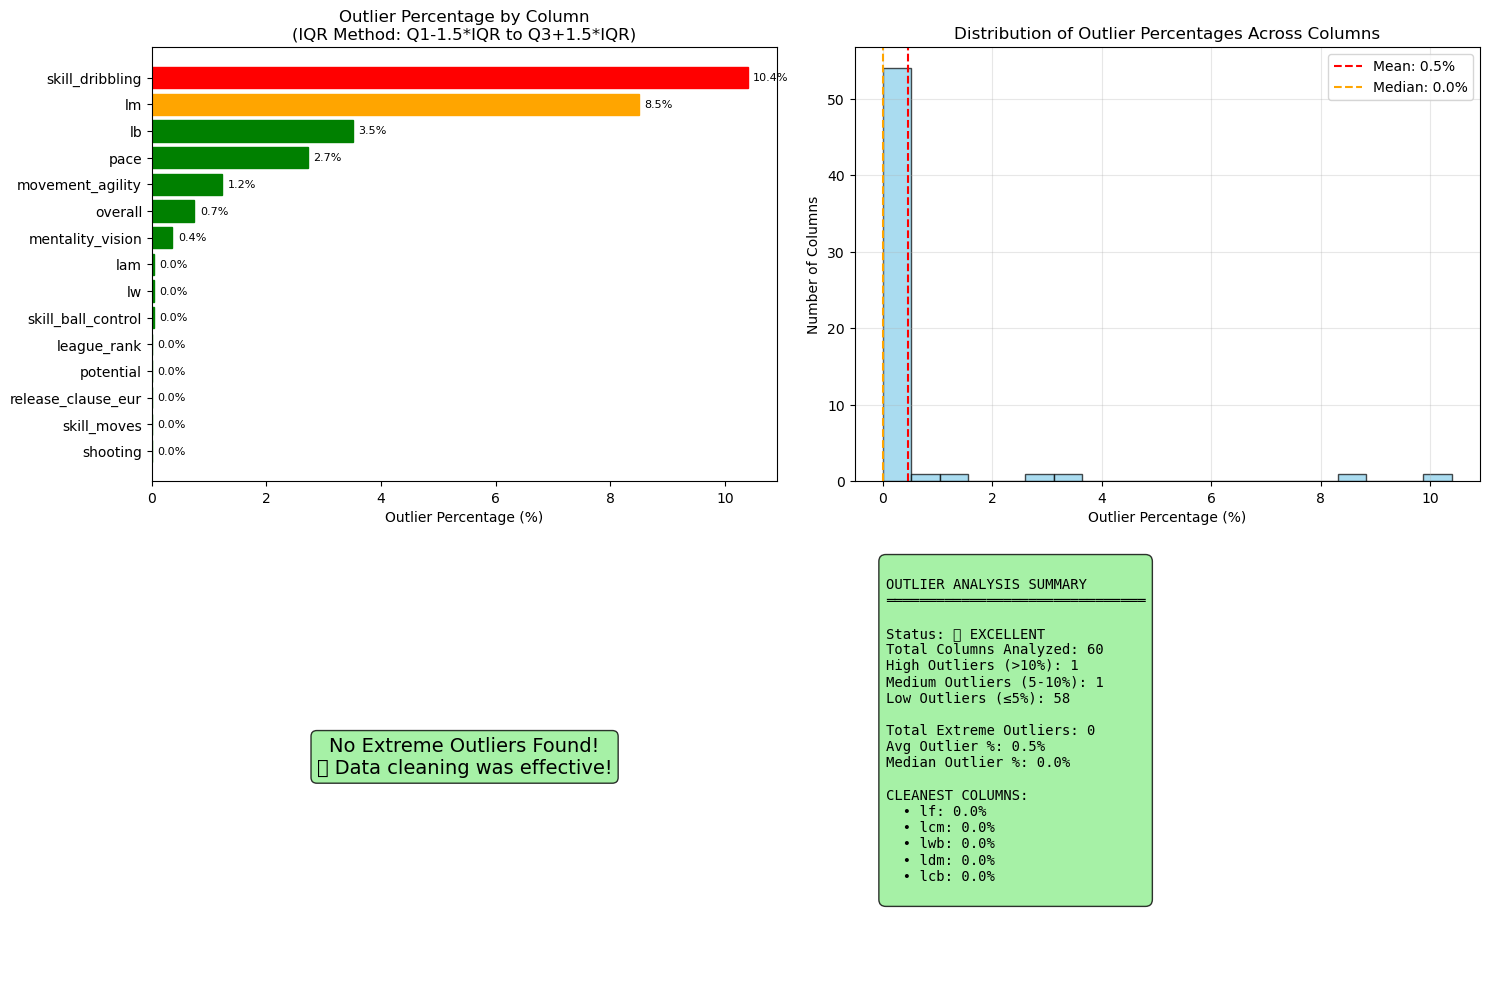

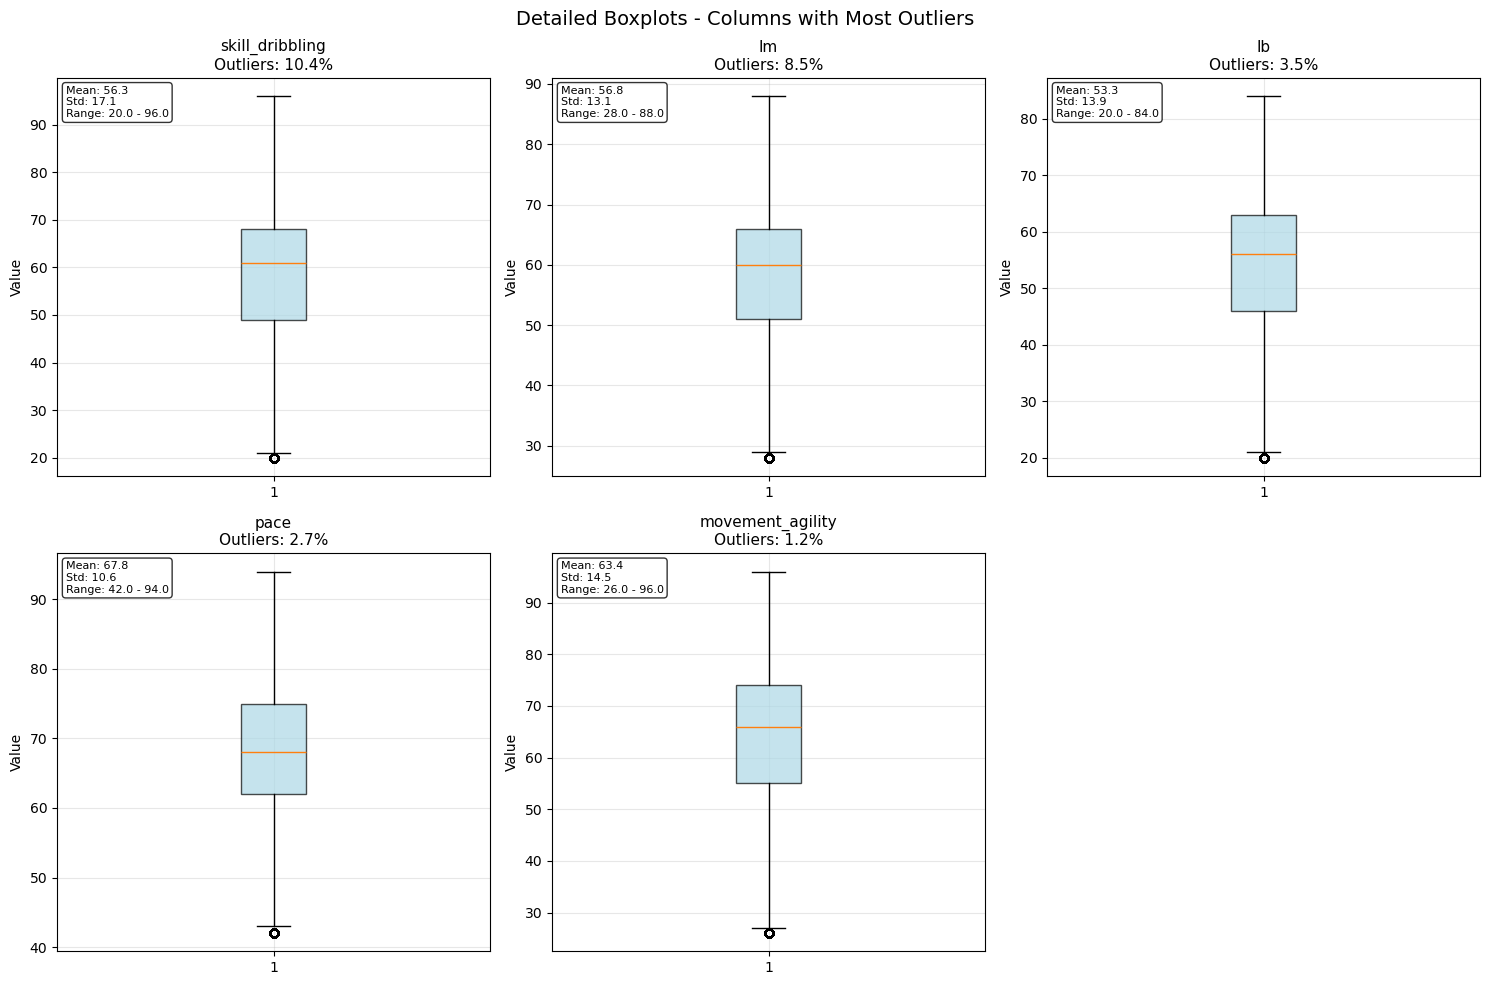


DETAILED OUTLIER SUMMARY
Column                    Outliers   %        Extreme  Mean         Std          Min          Max         
----------------------------------------------------------------------------------------------------
skill_dribbling           1969       10.4     0        56.3         17.1         20.0         96.0        
lm                        1610       8.5      0        56.8         13.1         28.0         88.0        
lb                        664        3.5      0        53.3         13.9         20.0         84.0        
pace                      458        2.7      0        67.8         10.6         42.0         94.0        
movement_agility          233        1.2      0        63.4         14.5         26.0         96.0        
overall                   140        0.7      0        65.7         7.0          48.0         84.0        
mentality_vision          67         0.4      0        53.8         13.7         16.0         92.0        
lam              

In [219]:
def visualize_outliers_comprehensive(data, exclude_columns=None, sample_columns=None, max_columns=None):
    """
    """
    # Set up columns to analyze
    if exclude_columns is None:
        exclude_columns = [
            'sofifa_id', 'age', 'contract_valid_until', 'team_jersey_number'
        ]
    
    # Get numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns = [col for col in numeric_columns if col not in exclude_columns]
    
    # Handle column selection
    if sample_columns:
        # Use specific columns if provided
        numeric_columns = [col for col in sample_columns if col in numeric_columns]
    elif max_columns and len(numeric_columns) > max_columns:
        # Limit to max_columns if specified
        print(f"📢 Note: Limiting analysis to {max_columns} columns (you have {len(numeric_columns)} numeric columns)")
        print("💡 Use max_columns=None to analyze all columns, or sample_columns=[...] for specific ones")
        numeric_columns = numeric_columns[:max_columns]
    
    print(f"Analyzing {len(numeric_columns)} numeric columns for outliers")
    print(f"Dataset shape: {data.shape}")
    
    # Calculate outlier statistics
    outlier_stats = []
    for col in numeric_columns:
        if data[col].count() == 0:
            continue
            
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        if IQR > 0:
            mild_lower = Q1 - 1.5 * IQR
            mild_upper = Q3 + 1.5 * IQR
            extreme_lower = Q1 - 3 * IQR
            extreme_upper = Q3 + 3 * IQR
            
            # Fix the outlier detection logic
            mild_outliers_mask = ((data[col] < mild_lower) | (data[col] > mild_upper))
            extreme_outliers_mask = ((data[col] < extreme_lower) | (data[col] > extreme_upper))
            
            mild_count = mild_outliers_mask.sum()
            extreme_count = extreme_outliers_mask.sum()
            
            outlier_stats.append({
                'column': col,
                'mild_outliers': mild_count,
                'extreme_outliers': extreme_count,
                'total_outliers': mild_count,  # Total outliers = mild outliers (includes extreme)
                'outlier_pct': (mild_count / data[col].count()) * 100,
                'extreme_pct': (extreme_count / data[col].count()) * 100,
                'mean': data[col].mean(),
                'std': data[col].std(),
                'min': data[col].min(),
                'max': data[col].max(),
                'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                'data_range': data[col].max() - data[col].min(),
                'cv': (data[col].std() / data[col].mean()) * 100 if data[col].mean() != 0 else 0
            })
        else:
            # Handle zero IQR case
            outlier_stats.append({
                'column': col,
                'mild_outliers': 0,
                'extreme_outliers': 0,
                'total_outliers': 0,
                'outlier_pct': 0.0,
                'extreme_pct': 0.0,
                'mean': data[col].mean(),
                'std': data[col].std(),
                'min': data[col].min(),
                'max': data[col].max(),
                'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                'data_range': data[col].max() - data[col].min(),
                'cv': (data[col].std() / data[col].mean()) * 100 if data[col].mean() != 0 else 0
            })
    
    outlier_df = pd.DataFrame(outlier_stats).sort_values('outlier_pct', ascending=False)
    
    # 1. OUTLIER PERCENTAGE OVERVIEW
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Outlier percentage by column
    plt.subplot(2, 2, 1)
    top_outliers = outlier_df.head(15)
    bars = plt.barh(range(len(top_outliers)), top_outliers['outlier_pct'])
    plt.yticks(range(len(top_outliers)), top_outliers['column'])
    plt.xlabel('Outlier Percentage (%)')
    plt.title('Outlier Percentage by Column\n(IQR Method: Q1-1.5*IQR to Q3+1.5*IQR)')
    plt.gca().invert_yaxis()
    
    # Color bars by severity
    for i, (bar, pct) in enumerate(zip(bars, top_outliers['outlier_pct'])):
        if pct > 10:
            bar.set_color('red')
        elif pct > 5:
            bar.set_color('orange')
        else:
            bar.set_color('green')
    
    # Add percentage labels
    for i, (bar, pct) in enumerate(zip(bars, top_outliers['outlier_pct'])):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', ha='left', fontsize=8)
    
    # Subplot 2: Distribution of outlier percentages
    plt.subplot(2, 2, 2)
    plt.hist(outlier_df['outlier_pct'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(outlier_df['outlier_pct'].mean(), color='red', linestyle='--', 
                label=f'Mean: {outlier_df["outlier_pct"].mean():.1f}%')
    plt.axvline(outlier_df['outlier_pct'].median(), color='orange', linestyle='--',
                label=f'Median: {outlier_df["outlier_pct"].median():.1f}%')
    plt.xlabel('Outlier Percentage (%)')
    plt.ylabel('Number of Columns')
    plt.title('Distribution of Outlier Percentages Across Columns')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Extreme outliers focus
    plt.subplot(2, 2, 3)
    extreme_outliers = outlier_df[outlier_df['extreme_pct'] > 0].head(10)
    if len(extreme_outliers) > 0:
        bars = plt.barh(range(len(extreme_outliers)), extreme_outliers['extreme_pct'], color='red', alpha=0.7)
        plt.yticks(range(len(extreme_outliers)), extreme_outliers['column'])
        plt.xlabel('Extreme Outlier Percentage (%)')
        plt.title('Extreme Outliers\n(Beyond Q1-3*IQR to Q3+3*IQR)')
        plt.gca().invert_yaxis()
        
        # Add labels
        for i, (bar, pct) in enumerate(zip(bars, extreme_outliers['extreme_pct'])):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{pct:.1f}%', va='center', ha='left', fontsize=8)
    else:
        plt.text(0.5, 0.5, 'No Extreme Outliers Found!\n🎉 Data cleaning was effective!', 
                ha='center', va='center', transform=plt.gca().transAxes, 
                fontsize=14, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
        plt.axis('off')
    
    # Subplot 4: Summary statistics
    plt.subplot(2, 2, 4)
    plt.axis('off')
    
    # Create summary text
    total_cols = len(outlier_df)
    high_outlier_cols = len(outlier_df[outlier_df['outlier_pct'] > 10])
    medium_outlier_cols = len(outlier_df[(outlier_df['outlier_pct'] > 5) & (outlier_df['outlier_pct'] <= 10)])
    low_outlier_cols = len(outlier_df[outlier_df['outlier_pct'] <= 5])
    total_extreme = outlier_df['extreme_outliers'].sum()
    
    # Add cleaning effectiveness assessment
    if outlier_df['outlier_pct'].mean() < 2:
        status = "🎉 EXCELLENT"
        color = 'lightgreen'
    elif outlier_df['outlier_pct'].mean() < 5:
        status = "✅ GOOD"  
        color = 'lightblue'
    else:
        status = "⚠️ NEEDS REVIEW"
        color = 'lightyellow'
    
    summary_text = f"""
OUTLIER ANALYSIS SUMMARY
═══════════════════════════════

Status: {status}
Total Columns Analyzed: {total_cols}
High Outliers (>10%): {high_outlier_cols}
Medium Outliers (5-10%): {medium_outlier_cols}  
Low Outliers (≤5%): {low_outlier_cols}

Total Extreme Outliers: {total_extreme:,}
Avg Outlier %: {outlier_df['outlier_pct'].mean():.1f}%
Median Outlier %: {outlier_df['outlier_pct'].median():.1f}%

CLEANEST COLUMNS:
{chr(10).join([f"  • {row['column']}: {row['outlier_pct']:.1f}%" 
               for _, row in outlier_df.tail(5).iterrows()])}
    """
    
    plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # 2. DETAILED BOXPLOTS FOR TOP OUTLIER COLUMNS (only if there are outliers)
    if len(outlier_df[outlier_df['outlier_pct'] > 1]) > 0:
        top_6 = outlier_df[outlier_df['outlier_pct'] > 1].head(6)
        
        if len(top_6) > 0:
            plt.figure(figsize=(15, 10))
            for i, (_, row) in enumerate(top_6.iterrows()):
                plt.subplot(2, 3, i+1)
                col = row['column']
                
                # Create boxplot
                box_plot = plt.boxplot(data[col].dropna(), patch_artist=True)
                box_plot['boxes'][0].set_facecolor('lightblue')
                box_plot['boxes'][0].set_alpha(0.7)
                
                plt.title(f'{col}\nOutliers: {row["outlier_pct"]:.1f}%', fontsize=11)
                plt.ylabel('Value')
                plt.grid(True, alpha=0.3)
                
                # Add statistics text
                stats_text = f"Mean: {row['mean']:.1f}\nStd: {row['std']:.1f}\nRange: {row['min']:.1f} - {row['max']:.1f}"
                plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
                        verticalalignment='top', fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            
            plt.suptitle('Detailed Boxplots - Columns with Most Outliers', fontsize=14, y=0.98)
            plt.tight_layout()
            plt.show()
    else:
        print("🎉 No significant outliers found - skipping detailed boxplots!")
    
    # 3. PRINT DETAILED SUMMARY TABLE
    print("\n" + "="*100)
    print("DETAILED OUTLIER SUMMARY")
    print("="*100)
    print(f"{'Column':<25} {'Outliers':<10} {'%':<8} {'Extreme':<8} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
    print("-"*100)
    
    display_rows = min(20, len(outlier_df))
    for _, row in outlier_df.head(display_rows).iterrows():
        print(f"{row['column']:<25} {row['total_outliers']:<10} {row['outlier_pct']:<8.1f} "
              f"{row['extreme_outliers']:<8} {row['mean']:<12.1f} {row['std']:<12.1f} "
              f"{row['min']:<12.1f} {row['max']:<12.1f}")
    
    if len(outlier_df) > display_rows:
        print(f"... and {len(outlier_df)-display_rows} more columns")
    
    print("="*100)
    
    # Quality Assessment
    avg_outlier_pct = outlier_df['outlier_pct'].mean()
    if avg_outlier_pct < 2:
        print("Average outlier percentage is very low - data is very clean!")
    elif avg_outlier_pct < 5:
        print("Average outlier percentage is acceptable")  
    else:
        print("Higher than expected outlier percentage - consider additional cleaning")
    
    if total_extreme == 0:
        print("No extreme outliers found - data cleaning was very effective!")
    
    return outlier_df


outlier_summary = visualize_outliers_comprehensive(fifa)  # Then visualize the CLEANED data
print(data['loaned_from'].unique()[:10])

CHECK TARGET LEAKAGE

In [ ]:
import pandas as pd
import os

def clean_target_leakage_fifa(data, target_column='value_eur', output_dir='./'):
    """
    Detect and remove target leakage for FIFA regression project
    Target: value_eur (player market value)
    """
    print(f"Before target leakage cleaning: {data.shape}")
    
    # Correlation thresholds for regression
    high_correlation_threshold = 0.85  # Above this - remove as leakage
    low_correlation_threshold = 0.5    # Below this - remove as not useful
    
    if target_column not in data.columns:
        print(f"Warning: Target variable '{target_column}' not found in data")
        return data
    
    target = data[target_column]
    columns_to_remove = []
    correlation_results = []
    
    # Known leakage columns for FIFA value prediction (always remove)
    known_leakage_columns = [
        'wage_eur',           # Wage is directly related to market value
        'release_clause_eur', # Release clause is set based on market value
        'long_name',          # Player names carry inherent market value information
    ]
    
    print("Checking for target leakage and feature relevance...")
    
    for col in data.columns:
        if col == target_column:
            continue

        try:
            dtype_str = str(data[col].dtype)
            
            # Known leakage columns
            if col in known_leakage_columns:
                columns_to_remove.append(col)
                correlation_results.append({
                    'column': col,
                    'type': 'known_leakage',
                    'correlation': np.nan,
                    'abs_correlation': np.nan,
                    'reason': 'known_leakage'
                })
                continue
            
            # Numeric columns
            if dtype_str in ['int64', 'float64', 'Int64', 'Float64'] or any(num_type in dtype_str.lower() for num_type in ['int', 'float']):
                try:
                    col_filled = data[col].fillna(data[col].median() if data[col].notna().any() else 0).astype('float64')
                    
                    # Skip low-variance or constant features
                    if col_filled.nunique() <= 1 or col_filled.std() == 0:
                        continue
                    
                    target_filled = target.fillna(target.median()).astype('float64')
                    if target_filled.std() == 0:
                        print("  Target has no variation, cannot calculate correlations")
                        break
                    
                    correlation = np.corrcoef(col_filled, target_filled)[0, 1]
                    
                    if not np.isnan(correlation):
                        abs_corr = abs(correlation)
                        
                        if abs_corr >= high_correlation_threshold:
                            columns_to_remove.append(col)
                            reason = "high_correlation_leakage"
                        elif abs_corr < low_correlation_threshold:
                            columns_to_remove.append(col)
                            reason = "low_correlation_irrelevant"
                        else:
                            reason = "useful_feature"
                            print(f"✅ KEPT {col:<30} - correlation: {correlation:>7.4f}")
                        
                        correlation_results.append({
                            'column': col,
                            'type': 'numeric',
                            'correlation': correlation,
                            'abs_correlation': abs_corr,
                            'reason': reason
                        })
                except Exception as e:
                    print(f"⚠️  Could not process numeric column '{col}': {e}")
                    continue
            
            # Categorical columns
            elif 'category' in dtype_str.lower() or dtype_str == 'object':
                try:
                    if data[col].nunique() <= 1:
                        continue
                    
                    dummies = pd.get_dummies(data[col], prefix=col, dummy_na=True)
                    max_correlation = 0
                    best_category = None
                    target_filled = target.fillna(target.median()).astype('float64')
                    
                    for dummy_col in dummies.columns:
                        if dummies[dummy_col].nunique() <= 1:
                            continue
                        dummy_corr = np.corrcoef(dummies[dummy_col], target_filled)[0, 1]
                        if not np.isnan(dummy_corr) and abs(dummy_corr) > abs(max_correlation):
                            max_correlation = dummy_corr
                            best_category = dummy_col
                    
                    if best_category is not None:
                        abs_max_corr = abs(max_correlation)
                        
                        if abs_max_corr >= high_correlation_threshold:
                            columns_to_remove.append(col)
                            reason = "high_correlation_leakage"
                        elif abs_max_corr < low_correlation_threshold:
                            columns_to_remove.append(col)
                            reason = "low_correlation_irrelevant"
                        else:
                            reason = "useful_feature"
                            print(f" KEPT {col:<30} - max corr: {max_correlation:>7.4f} via {best_category}")
                        
                        correlation_results.append({
                            'column': col,
                            'type': 'categorical',
                            'correlation': max_correlation,
                            'abs_correlation': abs_max_corr,
                            'best_category': best_category,
                            'reason': reason
                        })
                except Exception as e:
                    print(f"  Could not process categorical column '{col}': {e}")
                    continue
        except Exception as e:
            print(f"  General error in processing column '{col}': {e}")
            continue
        
        if reason == "useful_feature":
            print("=" * 80)
    
    if columns_to_remove:
        columns_to_remove = list(dict.fromkeys(columns_to_remove)) 
        
        leakage_cols = [col for col in columns_to_remove 
                        if any(result['column'] == col and 'leakage' in result['reason'] 
                               for result in correlation_results)]
        irrelevant_cols = [col for col in columns_to_remove 
                           if any(result['column'] == col and 'irrelevant' in result['reason'] 
                                  for result in correlation_results)]
        
        data_cleaned = data.drop(columns=columns_to_remove)
        
        print("\n📊 SUMMARY:")
        print(f"   • Removed {len(leakage_cols)} high correlation columns (>0.85): {leakage_cols}")
        print(f"   • Removed {len(irrelevant_cols)} low correlation columns (<0.5): {irrelevant_cols}")
        print(f"   • Total columns removed: {len(columns_to_remove)}")
        print("   • Kept features with correlation 0.5–0.85 as useful predictors")
    else:
        print("\n✅ No columns removed")
        data_cleaned = data.copy()
    
    print(f"\nAfter target leakage cleaning: {data_cleaned.shape}")
    
    # Save correlation results
    if correlation_results:
        results_df = pd.DataFrame(correlation_results)
        results_df['abs_correlation'] = pd.to_numeric(results_df['abs_correlation'], errors='coerce')
        results_df['correlation'] = pd.to_numeric(results_df['correlation'], errors='coerce')
        results_df = results_df.sort_values('abs_correlation', ascending=False, na_position='last')
    
    # Save cleaned data
    output_path = os.path.join(output_dir, 'fifa_target_leakage_cleaned.csv')
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    data_cleaned.to_csv(output_path, index=False)
    print(f"🔄 Cleaned data saved to: {output_path}")
    print(f"📊 Final dataset shape: {data_cleaned.shape}")
    print(f"📈 Target column '{target_column}' is included in the saved data")
    
    return data_cleaned

# Example usage:
fifa_cleaned = clean_target_leakage_fifa(fifa, target_column='value_eur', output_dir='./output/')


Before target leakage cleaning: (18943, 78)
Checking for target leakage and feature relevance...
✅ KEPT overall                        - correlation:  0.8319
✅ KEPT potential                      - correlation:  0.6955
✅ KEPT passing                        - correlation:  0.5758
✅ KEPT dribbling                      - correlation:  0.5562
✅ KEPT attacking_short_passing        - correlation:  0.5019
✅ KEPT movement_reactions             - correlation:  0.7286
✅ KEPT mentality_composure            - correlation:  0.6082
✅ KEPT lcm                            - correlation:  0.5094

📊 SUMMARY:
   • Removed 3 high correlation columns (>0.85): ['long_name', 'wage_eur', 'release_clause_eur']
   • Removed 62 low correlation columns (<0.5): ['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'team_position', 't